In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.linalg as lin

**Exercise 1**

In [2]:
def newt_q1(f, fp, x_0, toler=1e-5, max_iter=15):
    i = 0
    diff = 1e3
    x = x_0
    while diff > toler and i < max_iter:
        x_tilde = x - f(x) / fp(x)
        diff = np.abs(x_tilde - x)
        x = x_tilde
        i += 1
    if i < max_iter:
        print(f'Number of iterations: {i}')
    else:
        print('No convergence')
    return x, i < max_iter, i

In [3]:
f = lambda x: np.exp(x) - 2
fp = lambda x: np.exp(x)

In [4]:
newt_q1(f, fp, 1)

Number of iterations: 4


(0.6931471805600254, True, 4)

In [5]:
f(newt_q1(f, fp, 1)[0])

Number of iterations: 4


1.603162047558726e-13

In [6]:
g = lambda x: x ** 4 - 3
gp = lambda x: 4 * x ** 3

In [7]:
newt_q1(g, gp, 1)

Number of iterations: 5


(1.3160740129543826, True, 5)

In [8]:
opt.newton(f, 1, fp)

0.6931471805599453

In [9]:
opt.newton(g, 1, gp)

1.3160740129524924

**Exercise 2**

In [10]:
def determine_r(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** (-N2))
    fp = lambda r: P1 * N1 * (1 + r) ** (N1 - 1) - P2 * N2 * (1 + r) ** (-N2 - 1)
    return newt_q1(f, fp, 1, max_iter=50)

In [11]:
# Test
determine_r(30, 20, 2000, 8000)

Number of iterations: 24


(0.03877843204285935, True, 24)

**Exercise 3**

In [12]:
def newt_q3(f, fp, x_0, α, toler=1e-5, max_iter=15, print_flag=True):
    i = 0
    diff = 1e3
    x = x_0
    
    while diff > toler and i < max_iter:
        x_tilde = x - α * f(x) / fp(x)
        diff = np.abs(x_tilde - x)
        x = x_tilde
        i += 1
        
    if print_flag:
        if i < max_iter:
            print(f'Number of iterations: {i}')
        else:
            print('No convergence')
    return x, i < max_iter, i

In [13]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1/3)
fp = lambda x: 1 / 3 * np.power(np.abs(x), -2/3)

In [14]:
newt_q3(f, fp, 0.01, 1, max_iter=50)

No convergence


(11258999068425.709, False, 50)

In [15]:
newt_q3(f, fp, 0.01, 0.4, max_iter=50)

Number of iterations: 6


(6.400000000000134e-07, True, 6)

**Exercise 4**

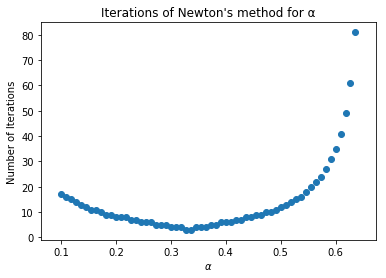

In [16]:
n = 100
gr_α = np.linspace(1e-1, 1, n)
pts = np.zeros((n, 2))

for i, α in enumerate(gr_α):
    result = newt_q3(f, fp, 0.01, α, max_iter=100, 
                      print_flag=False)
    if result[1]:
        pts[i, :] = (α, result[2])
    else:
        pts[i, :] = np.nan * np.ones(2)

plt.figure(figsize=(6, 4))
plt.scatter(pts[:, 0], pts[:, 1])
plt.title("Iterations of Newton's method for α")
plt.xlabel(r'$\alpha$')
plt.ylabel('Number of Iterations')
plt.show()

**Exercise 5**

In [17]:
def newt_q5(f, fp, x_0, α, toler=1e-5, max_iter=15, print_flag=True):
    
    i = 0
    diff = 1e3
    x = x_0
    
    if np.isscalar(x_0):
        while diff > toler and i < max_iter:
            x_tilde = x - α * f(x) / fp(x)
            diff = np.abs(x_tilde - x)
            x = x_tilde
            i += 1
    else:
        while diff > toler and i < max_iter:
            y = np.linalg.solve(fp(x), f(x))
            x_tilde = x - α * y
            diff = lin.norm(x_tilde - x, np.inf)
            x = x_tilde
            i += 1
        
    if print_flag:
        if i < max_iter:
            print(f'Number of iterations: {i}')
        else:
            print('No convergence')
    return x, i < max_iter, i

In [18]:
newt_q5(f, fp, 1, 0.4)

Number of iterations: 9


(-5.120000000000109e-07, True, 9)

In [19]:
def determine_r5(N1, N2, P1, P2):
    f = lambda r: P1 * ((1 + r) ** N1 - 1) - P2 * (1 - (1 + r) ** (-N2))
    fp = lambda r: P1 * N1 * (1 + r) ** (N1 - 1) - P2 * N2 * (1 + r) ** (-N2 - 1)
    return newt_q5(f, fp, 1, 1, max_iter=50)

In [20]:
determine_r5(30, 20, 2000, 8000)

Number of iterations: 24


(0.03877843204285935, True, 24)

In [21]:
def f(vec):
    x, y = vec
    return np.array([x ** 2, x ** 3 - y])

In [22]:
def Df(vec):
    x, y = vec
    return np.array([[2 * x , 0], [3 * x ** 2, -1]])

In [23]:
newt_q5(f, Df, [1.5, 1.5], α=0.5, max_iter=100)

Number of iterations: 38


(array([ 2.68175604e-05, -3.37714855e-11]), True, 38)

**Exercise 6**

In [24]:
γ = 5 # parameter that depends on various physical features of the system
δ = 1 # parameter that depends on various physical features of the system

def f(vec):
    x, y = vec
    return np.array([γ * x * y - x * (1 + y), 
                     -x * y + (δ - y) * (1 + y)])

def Df(vec):
    x, y = vec
    return np.array([[γ * y - (1 + y), γ * x - x],
                     [-y, -x + δ - 1 - 2 * y]])

def find_initialpt():
    for x in np.linspace(-1/4, 0):
        for y in np.linspace(0, 1/4):
            first_val = newt_q5(f, Df, [x, y], α=1, 
                                max_iter=100, print_flag=False)
            if np.allclose(first_val[0], [0, 1]) or np.allclose(first_val[0], [0, -1]):
                second_val = newt_q5(f, Df, [x, y], α=0.55, max_iter=100, print_flag=False)
                if np.allclose(second_val[0], [3.75, 0.25]):
                    return np.array([x, y])
                else:
                    pass
            else:
                pass
    print('There were no initial points.')
    return False

In [25]:
xvec = find_initialpt()
xvec

array([-0.25      ,  0.20408163])

In [26]:
newt_q5(f, Df, xvec, 0.55, max_iter=100)

Number of iterations: 18


(array([3.75000695, 0.25000218]), True, 18)

In [27]:
newt_q5(f, Df, xvec, 1, max_iter=100)

Number of iterations: 8


(array([-1.51741734e-19, -1.00000000e+00]), True, 8)

**Exercise 7**

In [28]:
def basins_attract(f, fp, zeros, rmin, rmax, 
           imin, imax, res, iters, toler=1e-5):
    
    realx = np.linspace(rmin, rmax, res)
    imagx = np.linspace(imin, imax, res)
    realX, imagX = np.meshgrid(realx, imagx)
    X_0 = realX + 1j * imagX
    
    i = 0
    diff = 1e3
    
    while diff > toler and i < iters:
        X_tilde = X_0 - f(X_0) / fp(X_0)
        diff = lin.norm(X_tilde - X_0)
        X_0 = X_tilde
        i += 1
        
    Y = np.zeros_like(X_0, dtype=int)
    diffs = 1e3 * np.ones_like(X_0, dtype=int)
        
    for r, R in enumerate(zeros):
        diffs_tilde = np.abs(X_0 - R)
        Y[diffs_tilde < diffs] = r
        diffs = diffs_tilde

    plt.pcolormesh(realX, imagX, Y, cmap='brg')
    plt.show()

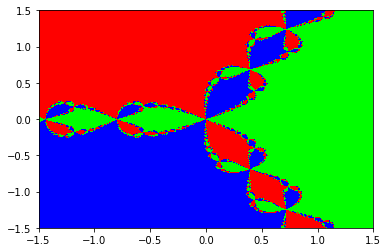

In [29]:
f = lambda x: x ** 3 - 1
fp = lambda x: 3 * x ** 2
zeros = np.array([-1/2 - np.sqrt(3) / 2 * 1j, 
                  -1/2 + np.sqrt(3) / 2 * 1j, 1])

basins_attract(f, fp, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)

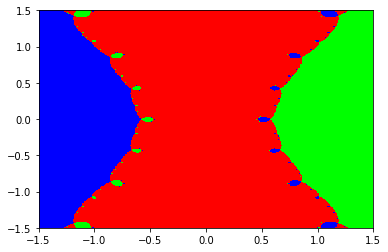

In [30]:
g = lambda x: x ** 3 - x
gp = lambda x: 3 * x ** 2 - 1
zeros = np.array([-1, 0, 1])
basins_attract(g, gp, zeros, -1.5, 1.5, -1.5, 1.5, 500, 50)